In [1]:
import scanpy as sc

In [3]:
adata = sc.read_h5ad('/Users/jay/Downloads/SEAAD_MTG_MERFISH.2024-02-13.h5ad')

In [4]:
adata

AnnData object with n_obs × n_vars = 366272 × 180
    obs: 'Donor ID', 'Sex', 'Gender', 'Age at Death', 'Race (choice=White)', 'Race (choice=Black/ African American)', 'Race (choice=Asian)', 'Race (choice=American Indian/ Alaska Native)', 'Race (choice=Native Hawaiian or Pacific Islander)', 'Race (choice=Unknown or unreported)', 'Race (choice=Other)', 'specify other race', 'Hispanic/Latino', 'Highest level of education', 'Years of education', 'PMI', 'Fresh Brain Weight', 'Brain pH', 'Overall AD neuropathological Change', 'Thal', 'Braak', 'CERAD score', 'Overall CAA Score', 'Highest Lewy Body Disease', 'Total Microinfarcts (not observed grossly)', 'Total microinfarcts in screening sections', 'Atherosclerosis', 'Arteriolosclerosis', 'LATE', 'Cognitive Status', 'Last CASI Score', 'Interval from last CASI in months', 'Last MMSE Score', 'Interval from last MMSE in months', 'Last MOCA Score', 'Interval from last MOCA in months', 'APOE4 Status', 'Primary Study Name', 'Secondary Study Name', '

In [5]:
adata.obs.columns

Index(['Donor ID', 'Sex', 'Gender', 'Age at Death', 'Race (choice=White)',
       'Race (choice=Black/ African American)', 'Race (choice=Asian)',
       'Race (choice=American Indian/ Alaska Native)',
       'Race (choice=Native Hawaiian or Pacific Islander)',
       'Race (choice=Unknown or unreported)', 'Race (choice=Other)',
       'specify other race', 'Hispanic/Latino', 'Highest level of education',
       'Years of education', 'PMI', 'Fresh Brain Weight', 'Brain pH',
       'Overall AD neuropathological Change', 'Thal', 'Braak', 'CERAD score',
       'Overall CAA Score', 'Highest Lewy Body Disease',
       'Total Microinfarcts (not observed grossly)',
       'Total microinfarcts in screening sections', 'Atherosclerosis',
       'Arteriolosclerosis', 'LATE', 'Cognitive Status', 'Last CASI Score',
       'Interval from last CASI in months', 'Last MMSE Score',
       'Interval from last MMSE in months', 'Last MOCA Score',
       'Interval from last MOCA in months', 'APOE4 Status',
 

In [10]:
adata.shape

(366272, 180)

In [12]:
adata.obs['Donor ID'].unique()
donor_dict = {donor: adata[adata.obs['Donor ID'] == donor].copy() for donor in adata.obs['Donor ID'].unique()}

In [14]:
adatatest = donor_dict['H21.33.006'].copy()

In [21]:
adatatest.var_names

Index(['PRRT4', 'GRIP2', 'FOXP2', 'PDZD2', 'KIAA1217', 'PALMD', 'LRRC4C',
       'ASIC2', 'NPAS3', 'LUZP2',
       ...
       'Blank-34', 'Blank-37', 'Blank-27', 'Blank-25', 'Blank-10', 'Blank-35',
       'Blank-13', 'Blank-9', 'Blank-0', 'Blank-33'],
      dtype='object', length=180)

/Users/jay/micromamba/envs/stalign/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))


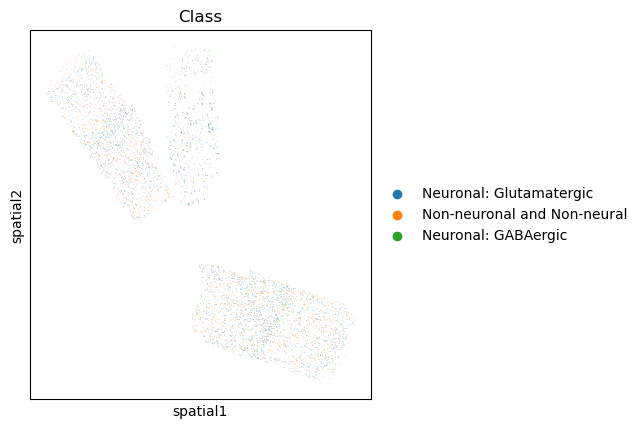

In [20]:
sc.pl.spatial(adatatest, color='Class', spot_size=10)

/Users/jay/micromamba/envs/stalign/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/Users/jay/micromamba/envs/stalign/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


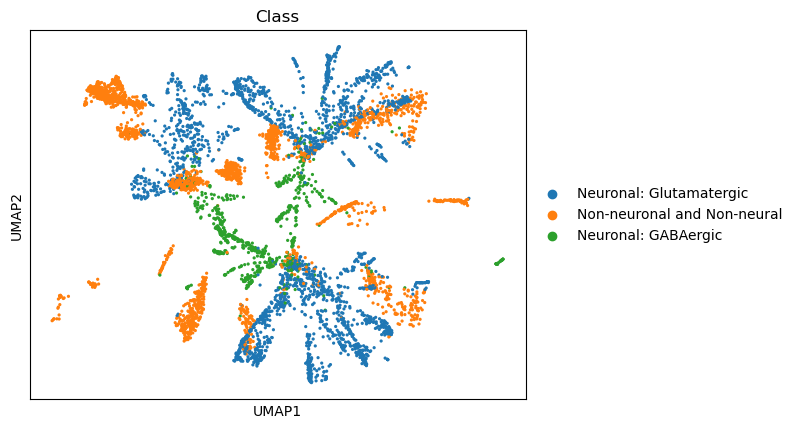

In [19]:
sc.pl.umap(adatatest, color='Class')

/Users/jay/micromamba/envs/stalign/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/Users/jay/micromamba/envs/stalign/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


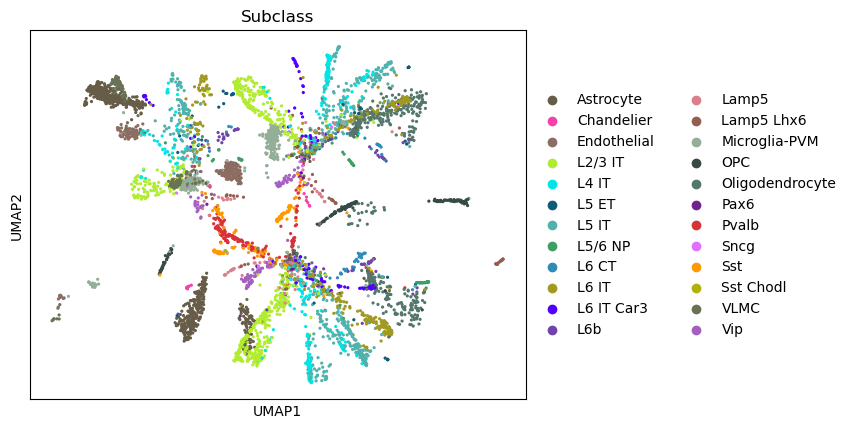

In [22]:
sc.pl.umap(adatatest, color='Subclass')

In [18]:
adatatest.obs.columns

Index(['Donor ID', 'Sex', 'Gender', 'Age at Death', 'Race (choice=White)',
       'Race (choice=Black/ African American)', 'Race (choice=Asian)',
       'Race (choice=American Indian/ Alaska Native)',
       'Race (choice=Native Hawaiian or Pacific Islander)',
       'Race (choice=Unknown or unreported)', 'Race (choice=Other)',
       'specify other race', 'Hispanic/Latino', 'Highest level of education',
       'Years of education', 'PMI', 'Fresh Brain Weight', 'Brain pH',
       'Overall AD neuropathological Change', 'Thal', 'Braak', 'CERAD score',
       'Overall CAA Score', 'Highest Lewy Body Disease',
       'Total Microinfarcts (not observed grossly)',
       'Total microinfarcts in screening sections', 'Atherosclerosis',
       'Arteriolosclerosis', 'LATE', 'Cognitive Status', 'Last CASI Score',
       'Interval from last CASI in months', 'Last MMSE Score',
       'Interval from last MMSE in months', 'Last MOCA Score',
       'Interval from last MOCA in months', 'APOE4 Status',
 

In [30]:
for key, adata in donor_dict.items():
    sc.pp.calculate_qc_metrics(adata, percent_top=None, log1p=False, inplace=True)

In [31]:
adatatest = donor_dict['H21.33.006'].copy()

In [32]:
adatatest

AnnData object with n_obs × n_vars = 5639 × 180
    obs: 'Donor ID', 'Sex', 'Gender', 'Age at Death', 'Race (choice=White)', 'Race (choice=Black/ African American)', 'Race (choice=Asian)', 'Race (choice=American Indian/ Alaska Native)', 'Race (choice=Native Hawaiian or Pacific Islander)', 'Race (choice=Unknown or unreported)', 'Race (choice=Other)', 'specify other race', 'Hispanic/Latino', 'Highest level of education', 'Years of education', 'PMI', 'Fresh Brain Weight', 'Brain pH', 'Overall AD neuropathological Change', 'Thal', 'Braak', 'CERAD score', 'Overall CAA Score', 'Highest Lewy Body Disease', 'Total Microinfarcts (not observed grossly)', 'Total microinfarcts in screening sections', 'Atherosclerosis', 'Arteriolosclerosis', 'LATE', 'Cognitive Status', 'Last CASI Score', 'Interval from last CASI in months', 'Last MMSE Score', 'Interval from last MMSE in months', 'Last MOCA Score', 'Interval from last MOCA in months', 'APOE4 Status', 'Primary Study Name', 'Secondary Study Name', 'Cl

In [33]:
df = adatatest.obs.copy()

In [34]:

sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor="white")

scanpy==1.9.6 anndata==0.10.4 umap==0.5.5 numpy==1.23.4 scipy==1.11.4 pandas==2.2.2 scikit-learn==1.3.2 statsmodels==0.14.1 igraph==0.11.4 pynndescent==0.5.11


In [ ]:
for key, adata in donor_dict.items():
    adata.layers['counts'] = adata.X.copy()
    sc.pp.normalize_total(adata, target_sum=1e4)
    sc.pp.log1p(adata)
    adata.layers['log1p'] = adata.X.copy()
    sc.pp.regress_out(adata, ["total_counts"])
    sc.pp.scale(adata, max_value=10)
    sc.tl.pca(adata, svd_solver="arpack")
    sc.pl.pca_variance_ratio(adata, log=True)


# GOLD calulation

In [36]:
import cellbin_moran as cm

In [37]:
adatatest.obs['Subclass'].unique()

['Lamp5', 'L2/3 IT', 'Vip', 'Astrocyte', 'Microglia-PVM', ..., 'VLMC', 'Sst Chodl', 'L6 CT', 'Pax6', 'L5/6 NP']
Length: 24
Categories (24, object): ['Astrocyte', 'Chandelier', 'Endothelial', 'L2/3 IT', ..., 'Sst', 'Sst Chodl', 'VLMC', 'Vip']

In [38]:
from scipy.spatial import cKDTree
for key, adata in donor_dict.items():
    print(key)
    mask = adata.obs['Subclass'] == 'Microglia-PVM'
    micro_points = adata[mask].obsm['spatial']
    other_points = adata.obsm['spatial']
    tree = cKDTree(micro_points)
    dists, _ = tree.query(other_points, k=1)
    adata.obs['distance_to_microglia'] = dists


H21.33.006
H20.33.001
H20.33.012
H20.33.044
H21.33.011
H21.33.040
H21.33.038
H21.33.021
H21.33.015
H21.33.001
H21.33.028
H21.33.031
H20.33.004
H21.33.016
H21.33.023
H20.33.040
H21.33.012
H20.33.015
H21.33.019
H20.33.035
H21.33.032
H21.33.005
H21.33.022
H20.33.025
H21.33.025
H21.33.013
H21.33.014


In [46]:
adta

AnnData object with n_obs × n_vars = 4114 × 180
    obs: 'Donor ID', 'Sex', 'Gender', 'Age at Death', 'Race (choice=White)', 'Race (choice=Black/ African American)', 'Race (choice=Asian)', 'Race (choice=American Indian/ Alaska Native)', 'Race (choice=Native Hawaiian or Pacific Islander)', 'Race (choice=Unknown or unreported)', 'Race (choice=Other)', 'specify other race', 'Hispanic/Latino', 'Highest level of education', 'Years of education', 'PMI', 'Fresh Brain Weight', 'Brain pH', 'Overall AD neuropathological Change', 'Thal', 'Braak', 'CERAD score', 'Overall CAA Score', 'Highest Lewy Body Disease', 'Total Microinfarcts (not observed grossly)', 'Total microinfarcts in screening sections', 'Atherosclerosis', 'Arteriolosclerosis', 'LATE', 'Cognitive Status', 'Last CASI Score', 'Interval from last CASI in months', 'Last MMSE Score', 'Interval from last MMSE in months', 'Last MOCA Score', 'Interval from last MOCA in months', 'APOE4 Status', 'Primary Study Name', 'Secondary Study Name', 'Cl

In [47]:
gold_result = {}
for key, adta in donor_dict.items():
    print(key)
    gold_result[key] = cm.al.compute_neighbor_moran_i_by_category(donor_dict[key], 'distance_to_microglia', 'Subclass', use_embedding=True, embedding_key='umap')

2024-10-06 10:07:57,097 - INFO - Starting Moran's I computation with value key 'distance_to_microglia'.
2024-10-06 10:07:57,107 - INFO - Identified 24 unique cell types in category 'Subclass'.
2024-10-06 10:07:57,120 - INFO - Processing cell type: Lamp5


2024-10-06 10:07:57,121 - INFO - Processing cell type: L2/3 IT
2024-10-06 10:07:57,121 - INFO - Processing cell type: Vip
2024-10-06 10:07:57,122 - INFO - Processing cell type: Astrocyte
2024-10-06 10:07:57,122 - INFO - Processing cell type: Microglia-PVM
2024-10-06 10:07:57,122 - INFO - Processing cell type: Pvalb
2024-10-06 10:07:57,126 - INFO - Processing cell type: OPC
2024-10-06 10:07:57,128 - INFO - Processing cell type: L6 IT
2024-10-06 10:07:57,129 - INFO - Processing cell type: L5 ET


H21.33.006


2024-10-06 10:07:57,157 - INFO - Processing cell type: Chandelier
2024-10-06 10:07:57,158 - INFO - Processing cell type: Lamp5 Lhx6
2024-10-06 10:07:57,168 - INFO - Processing cell type: L5 IT
/Users/jay/micromamba/envs/stalign/lib/python3.11/site-packages/esda/moran.py:227: RuntimeWarning: invalid value encountered in double_scalars
  k = k_num / k_den
/Users/jay/micromamba/envs/stalign/lib/python3.11/site-packages/esda/moran.py:238: RuntimeWarning: invalid value encountered in double_scalars
  return self.n / self.w.s0 * inum / self.z2ss
2024-10-06 10:07:58,861 - INFO - Processing cell type: Oligodendrocyte
2024-10-06 10:07:59,439 - INFO - Processing cell type: L4 IT
2024-10-06 10:07:59,975 - INFO - Processing cell type: Sncg
2024-10-06 10:08:00,030 - INFO - Processing cell type: L6b
2024-10-06 10:08:00,148 - INFO - Processing cell type: L6 IT Car3
2024-10-06 10:08:00,151 - INFO - Processing cell type: Sst
2024-10-06 10:08:00,395 - INFO - Processing cell type: Endothelial
2024-10-06 

H20.33.001


2024-10-06 10:08:53,454 - INFO - Processing cell type: L6 IT Car3
2024-10-06 10:08:54,081 - INFO - Processing cell type: VLMC
2024-10-06 10:09:07,668 - INFO - Processing cell type: Chandelier
2024-10-06 10:09:12,838 - INFO - Processing cell type: Pvalb
2024-10-06 10:09:19,073 - INFO - Processing cell type: L6 CT
2024-10-06 10:09:19,689 - INFO - Processing cell type: Lamp5
/Users/jay/micromamba/envs/stalign/lib/python3.11/site-packages/esda/moran.py:227: RuntimeWarning: invalid value encountered in double_scalars
  k = k_num / k_den
/Users/jay/micromamba/envs/stalign/lib/python3.11/site-packages/esda/moran.py:238: RuntimeWarning: invalid value encountered in double_scalars
  return self.n / self.w.s0 * inum / self.z2ss
2024-10-06 10:09:24,013 - INFO - Processing cell type: L5/6 NP
2024-10-06 10:09:24,625 - INFO - Processing cell type: Sncg
2024-10-06 10:09:24,935 - INFO - Processing cell type: L5 ET
2024-10-06 10:09:25,239 - INFO - Processing cell type: Lamp5 Lhx6
2024-10-06 10:09:25,46

H20.33.012


/Users/jay/micromamba/envs/stalign/lib/python3.11/site-packages/esda/moran.py:227: RuntimeWarning: invalid value encountered in double_scalars
  k = k_num / k_den
/Users/jay/micromamba/envs/stalign/lib/python3.11/site-packages/esda/moran.py:238: RuntimeWarning: invalid value encountered in double_scalars
  return self.n / self.w.s0 * inum / self.z2ss
2024-10-06 10:10:12,422 - INFO - Processing cell type: Lamp5
2024-10-06 10:10:12,544 - INFO - Processing cell type: OPC
2024-10-06 10:10:12,796 - INFO - Processing cell type: L6 IT
2024-10-06 10:10:13,259 - INFO - Processing cell type: Lamp5 Lhx6
2024-10-06 10:10:13,784 - INFO - Processing cell type: Sncg
2024-10-06 10:10:13,913 - INFO - Processing cell type: Pvalb
2024-10-06 10:10:13,926 - INFO - Processing cell type: Vip
2024-10-06 10:10:14,078 - INFO - Processing cell type: Chandelier
/Users/jay/micromamba/envs/stalign/lib/python3.11/site-packages/esda/moran.py:202: RuntimeWarning: invalid value encountered in divide
  self.z /= sy
2024

H20.33.044


/Users/jay/micromamba/envs/stalign/lib/python3.11/site-packages/esda/moran.py:227: RuntimeWarning: invalid value encountered in double_scalars
  k = k_num / k_den
/Users/jay/micromamba/envs/stalign/lib/python3.11/site-packages/esda/moran.py:238: RuntimeWarning: invalid value encountered in double_scalars
  return self.n / self.w.s0 * inum / self.z2ss
2024-10-06 10:10:27,366 - INFO - Processing cell type: L6 IT
2024-10-06 10:10:27,397 - INFO - Processing cell type: L4 IT
2024-10-06 10:10:27,675 - INFO - Processing cell type: Sncg
2024-10-06 10:10:28,774 - INFO - Processing cell type: L5 ET
2024-10-06 10:10:28,849 - INFO - Processing cell type: Vip
2024-10-06 10:10:29,143 - INFO - Processing cell type: VLMC
2024-10-06 10:10:29,736 - INFO - Processing cell type: L6b
2024-10-06 10:10:29,895 - INFO - Processing cell type: Lamp5
/Users/jay/micromamba/envs/stalign/lib/python3.11/site-packages/esda/moran.py:202: RuntimeWarning: invalid value encountered in divide
  self.z /= sy
2024-10-06 10:1

H21.33.011


/Users/jay/micromamba/envs/stalign/lib/python3.11/site-packages/esda/moran.py:227: RuntimeWarning: invalid value encountered in double_scalars
  k = k_num / k_den
/Users/jay/micromamba/envs/stalign/lib/python3.11/site-packages/esda/moran.py:238: RuntimeWarning: invalid value encountered in double_scalars
  return self.n / self.w.s0 * inum / self.z2ss
2024-10-06 10:10:51,936 - INFO - Processing cell type: L6b
2024-10-06 10:10:52,363 - INFO - Processing cell type: Sncg
2024-10-06 10:10:52,382 - INFO - Processing cell type: Sst Chodl
2024-10-06 10:10:52,571 - INFO - Processing cell type: L6 IT
2024-10-06 10:10:52,624 - INFO - Processing cell type: Lamp5
2024-10-06 10:10:52,654 - INFO - Processing cell type: L6 CT
2024-10-06 10:10:54,113 - INFO - Processing cell type: VLMC
2024-10-06 10:10:55,015 - INFO - Processing cell type: Pax6
2024-10-06 10:10:55,120 - INFO - Processing cell type: L5 ET
2024-10-06 10:10:55,209 - INFO - Processing cell type: Chandelier
2024-10-06 10:10:55,275 - INFO - 

H21.33.040


/Users/jay/micromamba/envs/stalign/lib/python3.11/site-packages/esda/moran.py:227: RuntimeWarning: invalid value encountered in double_scalars
  k = k_num / k_den
/Users/jay/micromamba/envs/stalign/lib/python3.11/site-packages/esda/moran.py:238: RuntimeWarning: invalid value encountered in double_scalars
  return self.n / self.w.s0 * inum / self.z2ss
2024-10-06 10:11:29,731 - INFO - Processing cell type: L4 IT
2024-10-06 10:11:30,134 - INFO - Processing cell type: L5/6 NP
2024-10-06 10:11:31,536 - INFO - Processing cell type: Sst
2024-10-06 10:11:32,966 - INFO - Processing cell type: L6b
2024-10-06 10:11:33,466 - INFO - Processing cell type: Pax6
2024-10-06 10:11:33,796 - INFO - Processing cell type: Vip
2024-10-06 10:11:34,372 - INFO - Processing cell type: Lamp5
2024-10-06 10:11:34,440 - INFO - Processing cell type: Sncg
2024-10-06 10:11:34,728 - INFO - Processing cell type: Lamp5 Lhx6
2024-10-06 10:11:34,926 - INFO - Processing cell type: Chandelier
2024-10-06 10:11:35,139 - INFO - 

H21.33.038


/Users/jay/micromamba/envs/stalign/lib/python3.11/site-packages/esda/moran.py:227: RuntimeWarning: invalid value encountered in double_scalars
  k = k_num / k_den
/Users/jay/micromamba/envs/stalign/lib/python3.11/site-packages/esda/moran.py:238: RuntimeWarning: invalid value encountered in double_scalars
  return self.n / self.w.s0 * inum / self.z2ss
2024-10-06 10:11:55,590 - INFO - Processing cell type: OPC
2024-10-06 10:11:55,827 - INFO - Processing cell type: L5 ET
2024-10-06 10:11:55,866 - INFO - Processing cell type: Pvalb
2024-10-06 10:11:56,012 - INFO - Processing cell type: L5/6 NP
2024-10-06 10:11:56,061 - INFO - Processing cell type: Lamp5 Lhx6
2024-10-06 10:11:56,126 - INFO - Processing cell type: L6b
2024-10-06 10:11:56,245 - INFO - Processing cell type: Lamp5
2024-10-06 10:11:56,331 - INFO - Processing cell type: Sncg
2024-10-06 10:11:56,339 - INFO - Processing cell type: Sst Chodl
2024-10-06 10:11:56,463 - INFO - Processing cell type: L6 CT
2024-10-06 10:11:56,623 - INFO 

H21.33.021


2024-10-06 10:12:01,187 - INFO - Processing cell type: Microglia-PVM
/Users/jay/micromamba/envs/stalign/lib/python3.11/site-packages/esda/moran.py:227: RuntimeWarning: invalid value encountered in double_scalars
  k = k_num / k_den
/Users/jay/micromamba/envs/stalign/lib/python3.11/site-packages/esda/moran.py:238: RuntimeWarning: invalid value encountered in double_scalars
  return self.n / self.w.s0 * inum / self.z2ss
2024-10-06 10:12:01,746 - INFO - Processing cell type: OPC
2024-10-06 10:12:02,110 - INFO - Processing cell type: Vip
2024-10-06 10:12:02,161 - INFO - Processing cell type: L5/6 NP
2024-10-06 10:12:02,702 - INFO - Processing cell type: Sst
2024-10-06 10:12:02,988 - INFO - Processing cell type: Oligodendrocyte
2024-10-06 10:12:03,020 - INFO - Processing cell type: L6 CT
2024-10-06 10:12:03,385 - INFO - Processing cell type: Sncg
2024-10-06 10:12:03,534 - INFO - Processing cell type: Lamp5 Lhx6
2024-10-06 10:12:03,730 - INFO - Processing cell type: Sst Chodl
2024-10-06 10:1

H21.33.015


2024-10-06 10:12:47,623 - INFO - Processing cell type: Pvalb
2024-10-06 10:12:47,848 - INFO - Processing cell type: Vip
2024-10-06 10:12:50,366 - INFO - Processing cell type: Microglia-PVM
2024-10-06 10:12:52,658 - INFO - Processing cell type: Lamp5
/Users/jay/micromamba/envs/stalign/lib/python3.11/site-packages/esda/moran.py:227: RuntimeWarning: invalid value encountered in double_scalars
  k = k_num / k_den
/Users/jay/micromamba/envs/stalign/lib/python3.11/site-packages/esda/moran.py:238: RuntimeWarning: invalid value encountered in double_scalars
  return self.n / self.w.s0 * inum / self.z2ss
2024-10-06 10:12:57,448 - INFO - Processing cell type: Endothelial
2024-10-06 10:12:59,607 - INFO - Processing cell type: L5/6 NP
2024-10-06 10:12:59,993 - INFO - Processing cell type: Sst Chodl
2024-10-06 10:13:12,678 - INFO - Processing cell type: L6 CT
2024-10-06 10:13:15,173 - INFO - Processing cell type: Sncg
2024-10-06 10:13:16,620 - INFO - Processing cell type: L5 ET
2024-10-06 10:13:17,

H21.33.001


/Users/jay/micromamba/envs/stalign/lib/python3.11/site-packages/esda/moran.py:227: RuntimeWarning: invalid value encountered in double_scalars
  k = k_num / k_den
/Users/jay/micromamba/envs/stalign/lib/python3.11/site-packages/esda/moran.py:238: RuntimeWarning: invalid value encountered in double_scalars
  return self.n / self.w.s0 * inum / self.z2ss
2024-10-06 10:14:43,355 - INFO - Processing cell type: Astrocyte
2024-10-06 10:14:43,514 - INFO - Processing cell type: L5 ET
2024-10-06 10:14:43,582 - INFO - Processing cell type: L6 CT
2024-10-06 10:14:45,729 - INFO - Processing cell type: L6b
2024-10-06 10:14:45,889 - INFO - Processing cell type: Chandelier
2024-10-06 10:14:46,184 - INFO - Processing cell type: Pvalb
2024-10-06 10:14:46,646 - INFO - Processing cell type: L6 IT
2024-10-06 10:14:46,773 - INFO - Processing cell type: Lamp5
2024-10-06 10:14:46,936 - INFO - Processing cell type: L5/6 NP
2024-10-06 10:14:47,408 - INFO - Processing cell type: Pax6
2024-10-06 10:14:47,441 - INF

H21.33.028


2024-10-06 10:15:10,833 - INFO - Processing cell type: L2/3 IT
/Users/jay/micromamba/envs/stalign/lib/python3.11/site-packages/esda/moran.py:227: RuntimeWarning: invalid value encountered in double_scalars
  k = k_num / k_den
/Users/jay/micromamba/envs/stalign/lib/python3.11/site-packages/esda/moran.py:238: RuntimeWarning: invalid value encountered in double_scalars
  return self.n / self.w.s0 * inum / self.z2ss
2024-10-06 10:15:11,303 - INFO - Processing cell type: Sncg
2024-10-06 10:15:11,364 - INFO - Processing cell type: Lamp5 Lhx6
2024-10-06 10:15:11,404 - INFO - Processing cell type: Endothelial
2024-10-06 10:15:12,224 - INFO - Processing cell type: Sst Chodl
2024-10-06 10:15:12,352 - INFO - Processing cell type: L6b
2024-10-06 10:15:12,555 - INFO - Processing cell type: Pvalb
2024-10-06 10:15:12,727 - INFO - Processing cell type: Pax6
2024-10-06 10:15:12,915 - INFO - Processing cell type: Lamp5
2024-10-06 10:15:12,940 - INFO - Processing cell type: L6 CT
2024-10-06 10:15:13,123 

H21.33.031


2024-10-06 10:15:37,959 - INFO - Processing cell type: L5 IT
2024-10-06 10:15:43,890 - INFO - Processing cell type: Microglia-PVM
2024-10-06 10:15:43,963 - INFO - Processing cell type: VLMC
2024-10-06 10:15:44,263 - INFO - Processing cell type: L6 IT Car3
2024-10-06 10:15:46,273 - INFO - Processing cell type: L5 ET
2024-10-06 10:15:47,743 - INFO - Processing cell type: Vip
/Users/jay/micromamba/envs/stalign/lib/python3.11/site-packages/esda/moran.py:227: RuntimeWarning: invalid value encountered in double_scalars
  k = k_num / k_den
/Users/jay/micromamba/envs/stalign/lib/python3.11/site-packages/esda/moran.py:238: RuntimeWarning: invalid value encountered in double_scalars
  return self.n / self.w.s0 * inum / self.z2ss
2024-10-06 10:15:48,273 - INFO - Processing cell type: L6 CT
2024-10-06 10:15:48,414 - INFO - Processing cell type: Lamp5 Lhx6
2024-10-06 10:15:48,997 - INFO - Processing cell type: Sst
2024-10-06 10:15:49,370 - INFO - Processing cell type: Lamp5
2024-10-06 10:15:49,592 

H20.33.004


2024-10-06 10:17:03,766 - INFO - Processing cell type: Chandelier
2024-10-06 10:17:04,733 - INFO - Processing cell type: L5/6 NP
2024-10-06 10:17:11,827 - INFO - Processing cell type: Pvalb
2024-10-06 10:17:12,963 - INFO - Processing cell type: L6b
2024-10-06 10:17:13,780 - INFO - Processing cell type: Lamp5 Lhx6
2024-10-06 10:17:14,834 - INFO - Processing cell type: L6 CT
2024-10-06 10:17:15,164 - INFO - Processing cell type: Sst
2024-10-06 10:17:15,421 - INFO - Processing cell type: L5 ET
2024-10-06 10:17:15,888 - INFO - Processing cell type: Lamp5
2024-10-06 10:17:16,879 - INFO - Processing cell type: Sncg
2024-10-06 10:17:16,968 - INFO - Processing cell type: Sst Chodl
2024-10-06 10:17:18,475 - INFO - Processing cell type: Pax6
/Users/jay/micromamba/envs/stalign/lib/python3.11/site-packages/esda/moran.py:227: RuntimeWarning: invalid value encountered in double_scalars
  k = k_num / k_den
/Users/jay/micromamba/envs/stalign/lib/python3.11/site-packages/esda/moran.py:238: RuntimeWarni

H21.33.016


/Users/jay/micromamba/envs/stalign/lib/python3.11/site-packages/esda/moran.py:227: RuntimeWarning: invalid value encountered in double_scalars
  k = k_num / k_den
/Users/jay/micromamba/envs/stalign/lib/python3.11/site-packages/esda/moran.py:238: RuntimeWarning: invalid value encountered in double_scalars
  return self.n / self.w.s0 * inum / self.z2ss
2024-10-06 10:19:05,210 - INFO - Processing cell type: L6 IT
2024-10-06 10:19:06,085 - INFO - Processing cell type: Lamp5
2024-10-06 10:19:06,370 - INFO - Processing cell type: L5 IT
2024-10-06 10:19:07,937 - INFO - Processing cell type: Pvalb
2024-10-06 10:19:08,733 - INFO - Processing cell type: Sst
2024-10-06 10:19:09,003 - INFO - Processing cell type: L5/6 NP
2024-10-06 10:19:09,145 - INFO - Processing cell type: Endothelial
2024-10-06 10:19:09,284 - INFO - Processing cell type: L5 ET
2024-10-06 10:19:10,124 - INFO - Processing cell type: Pax6
2024-10-06 10:19:10,151 - INFO - Processing cell type: Chandelier
2024-10-06 10:19:10,275 - I

H21.33.023


/Users/jay/micromamba/envs/stalign/lib/python3.11/site-packages/esda/moran.py:227: RuntimeWarning: invalid value encountered in double_scalars
  k = k_num / k_den
/Users/jay/micromamba/envs/stalign/lib/python3.11/site-packages/esda/moran.py:238: RuntimeWarning: invalid value encountered in double_scalars
  return self.n / self.w.s0 * inum / self.z2ss
2024-10-06 10:20:08,845 - INFO - Processing cell type: L6 CT
2024-10-06 10:20:09,822 - INFO - Processing cell type: L6 IT Car3
2024-10-06 10:20:10,958 - INFO - Processing cell type: Lamp5 Lhx6
2024-10-06 10:20:11,068 - INFO - Processing cell type: L6b
2024-10-06 10:20:11,983 - INFO - Processing cell type: VLMC
2024-10-06 10:20:13,488 - INFO - Processing cell type: Lamp5
2024-10-06 10:20:13,546 - INFO - Processing cell type: Sst Chodl
2024-10-06 10:20:14,093 - INFO - Processing cell type: Sncg
2024-10-06 10:20:14,221 - INFO - Processing cell type: Sst
2024-10-06 10:20:14,598 - INFO - Processing cell type: L5 ET
2024-10-06 10:20:14,656 - INF

H20.33.040


/Users/jay/micromamba/envs/stalign/lib/python3.11/site-packages/esda/moran.py:227: RuntimeWarning: invalid value encountered in double_scalars
  k = k_num / k_den
/Users/jay/micromamba/envs/stalign/lib/python3.11/site-packages/esda/moran.py:238: RuntimeWarning: invalid value encountered in double_scalars
  return self.n / self.w.s0 * inum / self.z2ss
2024-10-06 10:20:50,854 - INFO - Processing cell type: L6 IT Car3
2024-10-06 10:20:56,196 - INFO - Processing cell type: Sst
2024-10-06 10:21:01,359 - INFO - Processing cell type: L6b
2024-10-06 10:21:01,688 - INFO - Processing cell type: Lamp5 Lhx6
2024-10-06 10:21:02,827 - INFO - Processing cell type: Sncg
2024-10-06 10:21:03,034 - INFO - Processing cell type: Vip
2024-10-06 10:21:03,219 - INFO - Processing cell type: L5/6 NP
2024-10-06 10:21:03,489 - INFO - Processing cell type: Lamp5
2024-10-06 10:21:03,500 - INFO - Processing cell type: Sst Chodl
2024-10-06 10:21:03,994 - INFO - Processing cell type: Pax6
2024-10-06 10:21:04,606 - INF

H21.33.012


/Users/jay/micromamba/envs/stalign/lib/python3.11/site-packages/esda/moran.py:227: RuntimeWarning: invalid value encountered in double_scalars
  k = k_num / k_den
/Users/jay/micromamba/envs/stalign/lib/python3.11/site-packages/esda/moran.py:238: RuntimeWarning: invalid value encountered in double_scalars
  return self.n / self.w.s0 * inum / self.z2ss
2024-10-06 10:21:54,668 - INFO - Processing cell type: L6 IT
2024-10-06 10:21:54,775 - INFO - Processing cell type: L6b
2024-10-06 10:21:57,593 - INFO - Processing cell type: Lamp5
2024-10-06 10:22:02,176 - INFO - Processing cell type: L6 IT Car3
2024-10-06 10:22:02,448 - INFO - Processing cell type: L5/6 NP
2024-10-06 10:22:03,455 - INFO - Processing cell type: L5 ET
2024-10-06 10:22:03,537 - INFO - Processing cell type: Vip
2024-10-06 10:22:03,585 - INFO - Processing cell type: Lamp5 Lhx6
2024-10-06 10:22:03,895 - INFO - Processing cell type: Chandelier
2024-10-06 10:22:04,164 - INFO - Processing cell type: Sncg
2024-10-06 10:22:04,331 -

H20.33.015


2024-10-06 10:22:36,102 - INFO - Processing cell type: L6 IT
2024-10-06 10:22:36,202 - INFO - Processing cell type: Microglia-PVM
/Users/jay/micromamba/envs/stalign/lib/python3.11/site-packages/esda/moran.py:227: RuntimeWarning: invalid value encountered in double_scalars
  k = k_num / k_den
/Users/jay/micromamba/envs/stalign/lib/python3.11/site-packages/esda/moran.py:238: RuntimeWarning: invalid value encountered in double_scalars
  return self.n / self.w.s0 * inum / self.z2ss
2024-10-06 10:22:42,833 - INFO - Processing cell type: L6 IT Car3
2024-10-06 10:22:43,027 - INFO - Processing cell type: L6b
2024-10-06 10:22:44,410 - INFO - Processing cell type: Lamp5 Lhx6
2024-10-06 10:22:44,431 - INFO - Processing cell type: Pvalb
2024-10-06 10:22:44,579 - INFO - Processing cell type: Vip
2024-10-06 10:22:44,789 - INFO - Processing cell type: L6 CT
2024-10-06 10:22:44,884 - INFO - Processing cell type: L5 ET
2024-10-06 10:22:44,995 - INFO - Processing cell type: L5/6 NP
2024-10-06 10:22:45,1

H21.33.019


/Users/jay/micromamba/envs/stalign/lib/python3.11/site-packages/esda/moran.py:227: RuntimeWarning: invalid value encountered in double_scalars
  k = k_num / k_den
/Users/jay/micromamba/envs/stalign/lib/python3.11/site-packages/esda/moran.py:238: RuntimeWarning: invalid value encountered in double_scalars
  return self.n / self.w.s0 * inum / self.z2ss
2024-10-06 10:23:07,173 - INFO - Processing cell type: Lamp5
2024-10-06 10:23:07,201 - INFO - Processing cell type: L6b
2024-10-06 10:23:07,595 - INFO - Processing cell type: Vip
2024-10-06 10:23:07,600 - INFO - Processing cell type: Lamp5 Lhx6
2024-10-06 10:23:07,952 - INFO - Processing cell type: L6 IT Car3
2024-10-06 10:23:08,065 - INFO - Processing cell type: VLMC
2024-10-06 10:23:08,095 - INFO - Processing cell type: Pvalb
2024-10-06 10:23:08,222 - INFO - Processing cell type: Chandelier
2024-10-06 10:23:08,273 - INFO - Processing cell type: Pax6
/Users/jay/micromamba/envs/stalign/lib/python3.11/site-packages/esda/moran.py:202: Runtim

H20.33.035


2024-10-06 10:23:17,092 - INFO - Processing cell type: Lamp5
2024-10-06 10:23:17,180 - INFO - Processing cell type: L6 IT Car3
2024-10-06 10:23:17,327 - INFO - Processing cell type: L6 IT
2024-10-06 10:23:17,336 - INFO - Processing cell type: Microglia-PVM
2024-10-06 10:23:17,467 - INFO - Processing cell type: Sncg
/Users/jay/micromamba/envs/stalign/lib/python3.11/site-packages/esda/moran.py:227: RuntimeWarning: invalid value encountered in double_scalars
  k = k_num / k_den
/Users/jay/micromamba/envs/stalign/lib/python3.11/site-packages/esda/moran.py:238: RuntimeWarning: invalid value encountered in double_scalars
  return self.n / self.w.s0 * inum / self.z2ss
2024-10-06 10:23:18,248 - INFO - Processing cell type: L6 CT
2024-10-06 10:23:18,283 - INFO - Processing cell type: Lamp5 Lhx6
2024-10-06 10:23:18,706 - INFO - Processing cell type: L5/6 NP
2024-10-06 10:23:18,858 - INFO - Processing cell type: L5 ET
2024-10-06 10:23:18,906 - INFO - Processing cell type: Chandelier
2024-10-06 10

H21.33.032


/Users/jay/micromamba/envs/stalign/lib/python3.11/site-packages/esda/moran.py:227: RuntimeWarning: invalid value encountered in double_scalars
  k = k_num / k_den
/Users/jay/micromamba/envs/stalign/lib/python3.11/site-packages/esda/moran.py:238: RuntimeWarning: invalid value encountered in double_scalars
  return self.n / self.w.s0 * inum / self.z2ss
2024-10-06 10:23:24,164 - INFO - Processing cell type: Sst
2024-10-06 10:23:24,305 - INFO - Processing cell type: Pvalb
2024-10-06 10:23:24,557 - INFO - Processing cell type: L6b
2024-10-06 10:23:24,590 - INFO - Processing cell type: L6 CT
2024-10-06 10:23:24,660 - INFO - Processing cell type: L5 ET
2024-10-06 10:23:24,715 - INFO - Processing cell type: L6 IT Car3
2024-10-06 10:23:24,727 - INFO - Processing cell type: Sncg
/Users/jay/micromamba/envs/stalign/lib/python3.11/site-packages/esda/moran.py:202: RuntimeWarning: invalid value encountered in divide
  self.z /= sy
2024-10-06 10:23:24,742 - INFO - Processing cell type: Pax6
2024-10-06

H21.33.005


/Users/jay/micromamba/envs/stalign/lib/python3.11/site-packages/esda/moran.py:227: RuntimeWarning: invalid value encountered in double_scalars
  k = k_num / k_den
/Users/jay/micromamba/envs/stalign/lib/python3.11/site-packages/esda/moran.py:238: RuntimeWarning: invalid value encountered in double_scalars
  return self.n / self.w.s0 * inum / self.z2ss
2024-10-06 10:23:28,065 - INFO - Processing cell type: L6b
2024-10-06 10:23:28,467 - INFO - Processing cell type: L6 CT
2024-10-06 10:23:28,540 - INFO - Processing cell type: L5 ET
2024-10-06 10:23:28,585 - INFO - Processing cell type: L5/6 NP
2024-10-06 10:23:28,681 - INFO - Processing cell type: Lamp5 Lhx6
2024-10-06 10:23:28,693 - INFO - Processing cell type: Pax6
2024-10-06 10:23:28,765 - INFO - Processing cell type: Vip
2024-10-06 10:23:28,780 - INFO - Processing cell type: Lamp5
2024-10-06 10:23:28,838 - INFO - Processing cell type: Sncg
2024-10-06 10:23:28,891 - INFO - Processing cell type: Sst
2024-10-06 10:23:28,903 - INFO - Proce

H21.33.022


/Users/jay/micromamba/envs/stalign/lib/python3.11/site-packages/esda/moran.py:227: RuntimeWarning: invalid value encountered in double_scalars
  k = k_num / k_den
/Users/jay/micromamba/envs/stalign/lib/python3.11/site-packages/esda/moran.py:238: RuntimeWarning: invalid value encountered in double_scalars
  return self.n / self.w.s0 * inum / self.z2ss
2024-10-06 10:23:31,939 - INFO - Processing cell type: Vip
2024-10-06 10:23:31,995 - INFO - Processing cell type: VLMC
2024-10-06 10:23:32,153 - INFO - Processing cell type: Sst Chodl
2024-10-06 10:23:32,257 - INFO - Processing cell type: L4 IT
2024-10-06 10:23:32,431 - INFO - Processing cell type: Sncg
2024-10-06 10:23:32,505 - INFO - Processing cell type: Pvalb
2024-10-06 10:23:32,630 - INFO - Processing cell type: Sst
2024-10-06 10:23:32,673 - INFO - Processing cell type: L6 CT
2024-10-06 10:23:32,804 - INFO - Processing cell type: L5/6 NP
2024-10-06 10:23:32,826 - INFO - Processing cell type: Pax6
2024-10-06 10:23:32,959 - INFO - Proce

H20.33.025


/Users/jay/micromamba/envs/stalign/lib/python3.11/site-packages/esda/moran.py:227: RuntimeWarning: invalid value encountered in double_scalars
  k = k_num / k_den
/Users/jay/micromamba/envs/stalign/lib/python3.11/site-packages/esda/moran.py:238: RuntimeWarning: invalid value encountered in double_scalars
  return self.n / self.w.s0 * inum / self.z2ss
2024-10-06 10:23:42,934 - INFO - Processing cell type: L5 IT
2024-10-06 10:23:43,192 - INFO - Processing cell type: L6 IT Car3
2024-10-06 10:23:43,204 - INFO - Processing cell type: OPC
2024-10-06 10:23:44,303 - INFO - Processing cell type: Lamp5 Lhx6
2024-10-06 10:23:44,399 - INFO - Processing cell type: Pvalb
2024-10-06 10:23:45,114 - INFO - Processing cell type: Sst
2024-10-06 10:23:45,799 - INFO - Processing cell type: L5/6 NP
2024-10-06 10:23:46,115 - INFO - Processing cell type: Chandelier
2024-10-06 10:23:46,354 - INFO - Processing cell type: L5 ET
2024-10-06 10:23:46,478 - INFO - Processing cell type: L6 CT
2024-10-06 10:23:46,718 

H21.33.025


/Users/jay/micromamba/envs/stalign/lib/python3.11/site-packages/esda/moran.py:227: RuntimeWarning: invalid value encountered in double_scalars
  k = k_num / k_den
/Users/jay/micromamba/envs/stalign/lib/python3.11/site-packages/esda/moran.py:238: RuntimeWarning: invalid value encountered in double_scalars
  return self.n / self.w.s0 * inum / self.z2ss
2024-10-06 10:23:55,955 - INFO - Processing cell type: OPC
2024-10-06 10:23:55,974 - INFO - Processing cell type: Pvalb
2024-10-06 10:23:56,222 - INFO - Processing cell type: L2/3 IT
2024-10-06 10:23:56,411 - INFO - Processing cell type: Oligodendrocyte
2024-10-06 10:23:56,619 - INFO - Processing cell type: L6b
2024-10-06 10:23:56,927 - INFO - Processing cell type: Sst
2024-10-06 10:23:56,944 - INFO - Processing cell type: L5 ET
2024-10-06 10:23:57,161 - INFO - Processing cell type: L5/6 NP
2024-10-06 10:23:57,232 - INFO - Processing cell type: Sncg
2024-10-06 10:23:57,308 - INFO - Processing cell type: Pax6
2024-10-06 10:23:57,558 - INFO 

H21.33.013


/Users/jay/micromamba/envs/stalign/lib/python3.11/site-packages/esda/moran.py:227: RuntimeWarning: invalid value encountered in double_scalars
  k = k_num / k_den
/Users/jay/micromamba/envs/stalign/lib/python3.11/site-packages/esda/moran.py:238: RuntimeWarning: invalid value encountered in double_scalars
  return self.n / self.w.s0 * inum / self.z2ss
2024-10-06 10:24:00,822 - INFO - Processing cell type: Sst
2024-10-06 10:24:00,883 - INFO - Processing cell type: L6 IT
2024-10-06 10:24:00,905 - INFO - Processing cell type: L6b
2024-10-06 10:24:00,954 - INFO - Processing cell type: L2/3 IT
2024-10-06 10:24:00,987 - INFO - Processing cell type: Endothelial
2024-10-06 10:24:01,141 - INFO - Processing cell type: L5/6 NP
2024-10-06 10:24:01,179 - INFO - Processing cell type: Vip
2024-10-06 10:24:01,203 - INFO - Processing cell type: Lamp5 Lhx6
2024-10-06 10:24:01,241 - INFO - Processing cell type: Pax6
2024-10-06 10:24:01,244 - WARNING - No data available for cell type: Pax6 (insufficient nu

H21.33.014


/Users/jay/micromamba/envs/stalign/lib/python3.11/site-packages/esda/moran.py:227: RuntimeWarning: invalid value encountered in double_scalars
  k = k_num / k_den
/Users/jay/micromamba/envs/stalign/lib/python3.11/site-packages/esda/moran.py:238: RuntimeWarning: invalid value encountered in double_scalars
  return self.n / self.w.s0 * inum / self.z2ss
2024-10-06 10:24:02,401 - INFO - Processing cell type: Chandelier
2024-10-06 10:24:02,403 - WARNING - No data available for cell type: Chandelier (insufficient number of cells or other issues).
/Users/jay/micromamba/envs/stalign/lib/python3.11/site-packages/esda/moran.py:238: RuntimeWarning: invalid value encountered in double_scalars
  return self.n / self.w.s0 * inum / self.z2ss
2024-10-06 10:24:02,406 - INFO - Processing cell type: L6b
2024-10-06 10:24:02,491 - INFO - Processing cell type: Sst
2024-10-06 10:24:02,608 - INFO - Processing cell type: VLMC
2024-10-06 10:24:02,750 - INFO - Processing cell type: L5/6 NP
2024-10-06 10:24:02,84

In [48]:
gold_result

{'H21.33.006':                  Moran's I        P-value  num_cell
 Subclass                                           
 L6 IT             0.375374  3.879811e-276       422
 L6b               0.369231   4.529267e-19        81
 Lamp5             0.326517   5.523728e-16        82
 L6 IT Car3        0.238736   9.292436e-18       146
 L4 IT             0.222558   1.681176e-62       337
 L5 ET             0.184007   6.578367e-03        46
 Lamp5 Lhx6        0.170944   3.083101e-05       101
 OPC               0.154323   4.429845e-13       209
 Astrocyte         0.151250  6.787075e-200       792
 L6 CT             0.148267   2.211118e-03        63
 L2/3 IT           0.126341  1.521726e-110       700
 VLMC              0.122338   1.822453e-21       245
 Vip               0.119827   7.459118e-07       133
 Sst               0.091457   1.179241e-04       168
 Pvalb             0.084796   9.450605e-07       193
 L5 IT             0.068924   7.194113e-22       631
 Oligodendrocyte   0.058331   1.

In [49]:
for key, df in gold_result.items():
    df['sample'] = key

In [51]:
import pandas as pd

In [52]:
gold_concat = pd.concat(gold_result.values())

In [63]:
gold_concat['category']=gold_concat.index
gold_concat.reset_index(inplace=True)

In [64]:
gold_concat.to_csv('gold_concat.csv')

In [65]:
gold_concat

,Subclass,Moran's I,P-value,num_cell,sample,category
0,L6 IT,0.375374,3.879811e-276,422,H21.33.006,L6 IT
1,L6b,0.369231,4.529267e-19,81,H21.33.006,L6b
2,Lamp5,0.326517,5.523728e-16,82,H21.33.006,Lamp5
3,L6 IT Car3,0.238736,9.292436e-18,146,H21.33.006,L6 IT Car3
4,L4 IT,0.222558,1.681176e-62,337,H21.33.006,L4 IT
...,...,...,...,...,...,...
629,L5/6 NP,-0.020220,9.381165e-01,61,H21.33.014,L5/6 NP
630,L6 IT Car3,-0.047093,2.265303e-01,97,H21.33.014,L6 IT Car3
631,Sncg,-0.075820,6.585191e-01,22,H21.33.014,Sncg
632,Lamp5,-0.087998,3.378504e-01,49,H21.33.014,Lamp5


In [57]:
import seaborn as sns

In [68]:
fil_df = gold_concat[gold_concat['P-value'] < 0.05]

/Users/jay/micromamba/envs/stalign/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/jay/micromamba/envs/stalign/lib/python3.11/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/Users/jay/micromamba/envs/stalign/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/jay/micromamba/envs/stalign/lib/python3.11/site-packages/seaborn/categoric

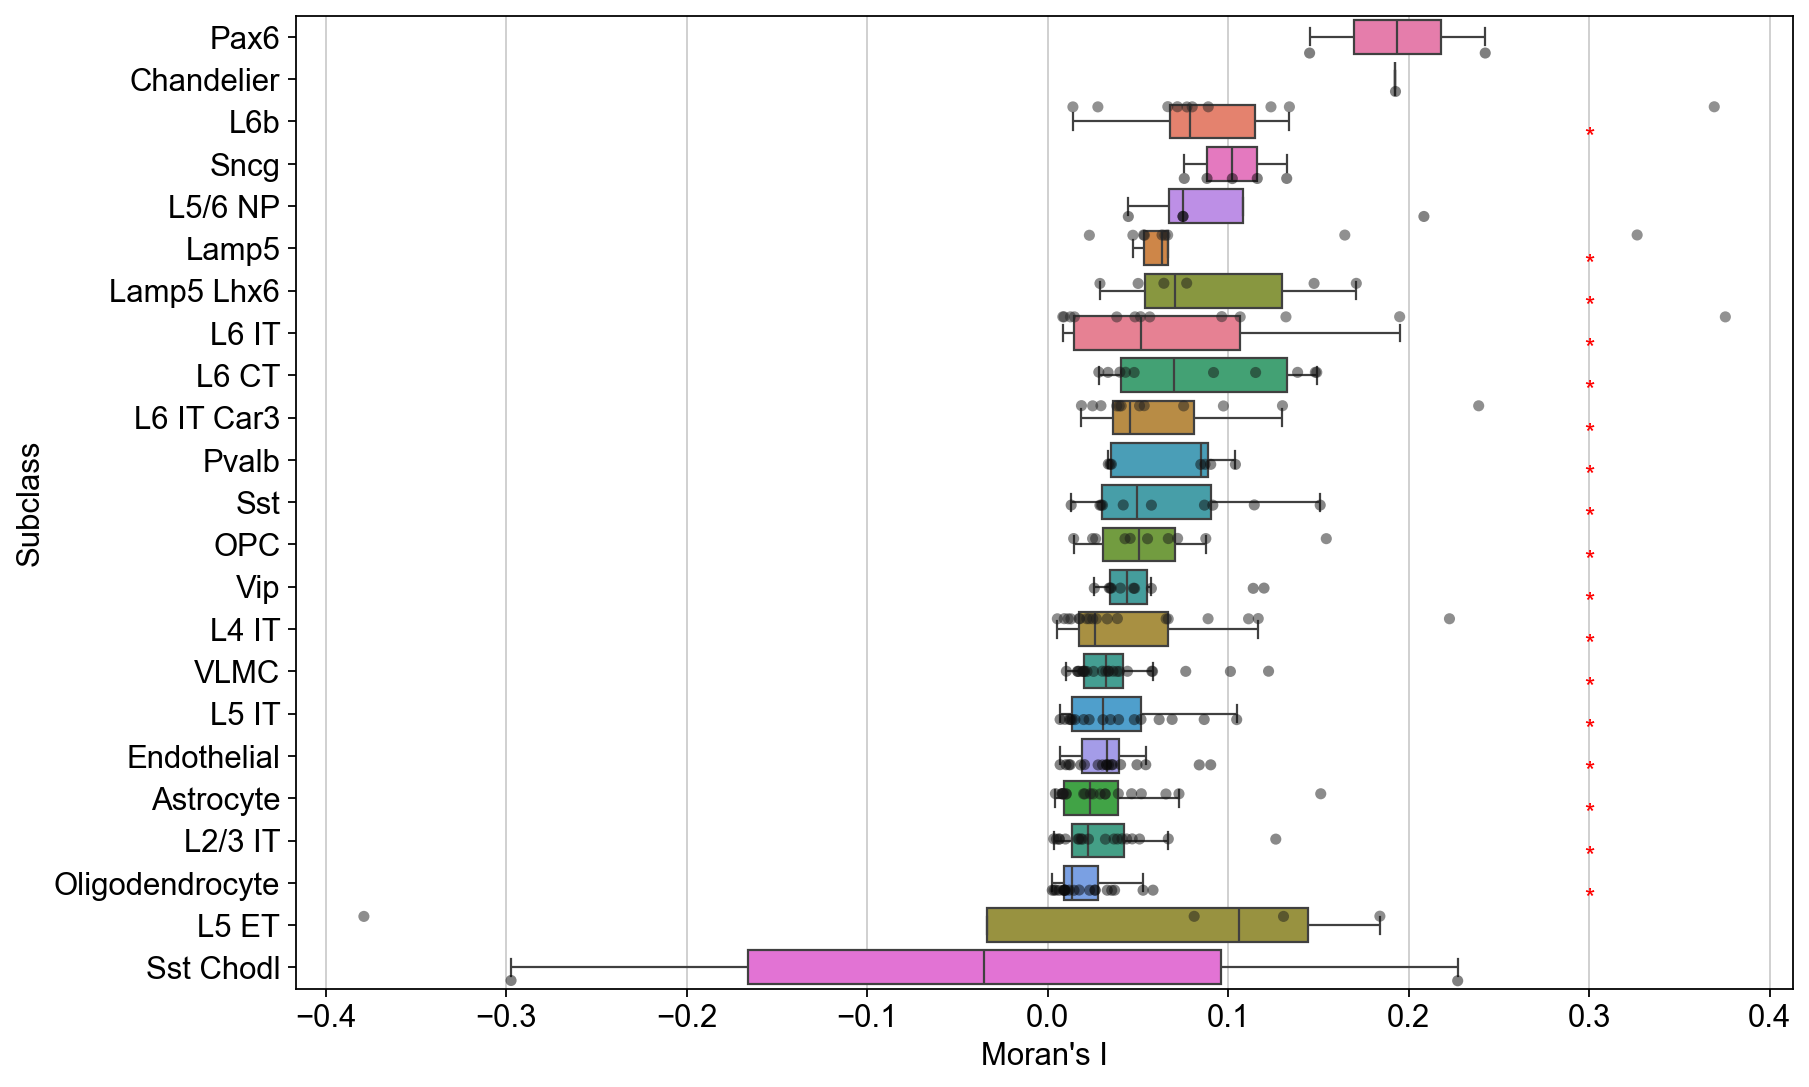

In [82]:
import seaborn as sns
from scipy.stats import wilcoxon
import matplotlib.pyplot as plt

# Calculate the mean of "Moran's I" for each subclass and sort them
mean_morans_i = fil_df.groupby('Subclass')["Moran's I"].mean().sort_values(ascending=False)
sorted_subclasses = mean_morans_i.index

# Set the figure size
plt.figure(figsize=(12, 8))

# Create the boxplot with sorted subclasses and remove fliers
ax = sns.boxplot(data=fil_df, y='Subclass', x="Moran's I", order=sorted_subclasses, hue='Subclass', showfliers=False)

# Overlay stripplot to show individual data points
sns.stripplot(data=fil_df, y='Subclass', x="Moran's I", order=sorted_subclasses, hue='Subclass', 
              dodge=True, jitter=True, ax=ax, color='black', alpha=0.5)

# Perform Wilcoxon test and annotate significant boxes
for i, subclass in enumerate(sorted_subclasses):
    subclass_data = fil_df[fil_df['Subclass'] == subclass]["Moran's I"]
    stat, p_value = wilcoxon(subclass_data - 0)
    if p_value < 0.05:
        ax.annotate('*', xy=(0.3, i + 0.4), ha='center', va='center', fontsize=12, color='red')

plt.legend([],[], frameon=False)  # Remove the duplicate legend
plt.show()


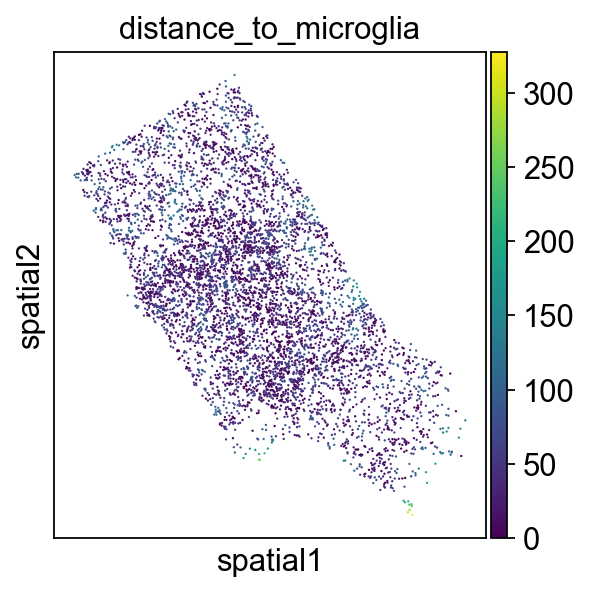

In [45]:
sc.pl.spatial(donor_dict['H21.33.005'], color='distance_to_microglia', spot_size=20)

In [40]:
gold_result

{'H21.33.006':                  Moran's I   P-value  num_cell
 Subclass                                      
 L2/3 IT          -0.001577  0.125448       490
 Oligodendrocyte  -0.001580  0.825417       653
 Astrocyte        -0.001976  0.482548       458
 L6 IT            -0.003118  0.294657       264
 VLMC             -0.003403  0.003711       182
 L5 IT            -0.003636  0.749473       258
 Endothelial      -0.003686  0.531785       249
 L4 IT            -0.003756  0.760457       278
 Pvalb            -0.007808  0.346753       149
 Sst              -0.008465  0.654456       112
 OPC              -0.008946  0.427251       101
 Vip              -0.009084  0.486127       121
 L6b              -0.010866  0.909321        91
 L6 IT Car3       -0.010894  0.739282        97
 L5/6 NP          -0.015232  0.559686        61
 L6 CT            -0.017883  0.784201        59
 Lamp5            -0.022919  0.596044        49
 Lamp5 Lhx6       -0.024611  0.943793        41
 Sncg             -0.04320